Ref: 
- https://zhuanlan.zhihu.com/p/57389880
- https://www.lizenghai.com/archives/1320.html

Overlap Studies Functions重叠指标

![Alt text](https://pic1.zhimg.com/80/v2-e9b7d772b99762d140aec9daa3cfe5b4_hd.jpg "optional title")

## 移动平均线系列

通用函数名：MA

代码：ta.MA(close,timeperiod=30,matype=0)

移动平均线系列指标包括：SMA简单移动平均线、EMA指数移动平均线、WMA加权移动平均线、DEMA双移动平均线、TEMA三重指数移动平均线、TRIMA三角移动平均线、KAMA考夫曼自适应移动平均线、MAMA为MESA自适应移动平均线、T3三重指数移动平均线。

其中，close为收盘价，时间序列，timeperiod为时间短，默认30天，指标类型matype分别对应：0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)

不同类型的移动均线也有各自相应的调用函数：

![](https://pic1.zhimg.com/80/v2-06e8299581a47119d601dfa33a5c15c0_hd.jpg)

In [ ]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline   
import plotly_express as px

#正常显示画图时出现的中文和负号
from pylab import mpl
matplotlib.rc('font', family='sans-serif') 
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False

#引入TA-Lib库
import talib as ta

#查看包含的技术指标和数学运算函数
#print(ta.get_functions())
#print(ta.get_function_groups())

ta_fun=ta.get_function_groups()
ta_fun.keys()

#使用tushare获取上证指数数据作为示例
import tushare as ts
df=ts.get_k_data('sh',start='2000-01-01')
df.index=pd.to_datetime(df.date)
df=df.sort_index()

types=['SMA','EMA','WMA','DEMA','TEMA', 'TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)
# df_ma.tail()
# df_ma.loc['2018-08-01':].plot(figsize=(16,6))
# ax = plt.gca()  
# ax.spines['right'].set_color('none') 
# ax.spines['top'].set_color('none')   
# plt.title('上证指数各种类型移动平均线',fontsize=15)
# plt.xlabel('')
# plt.show()

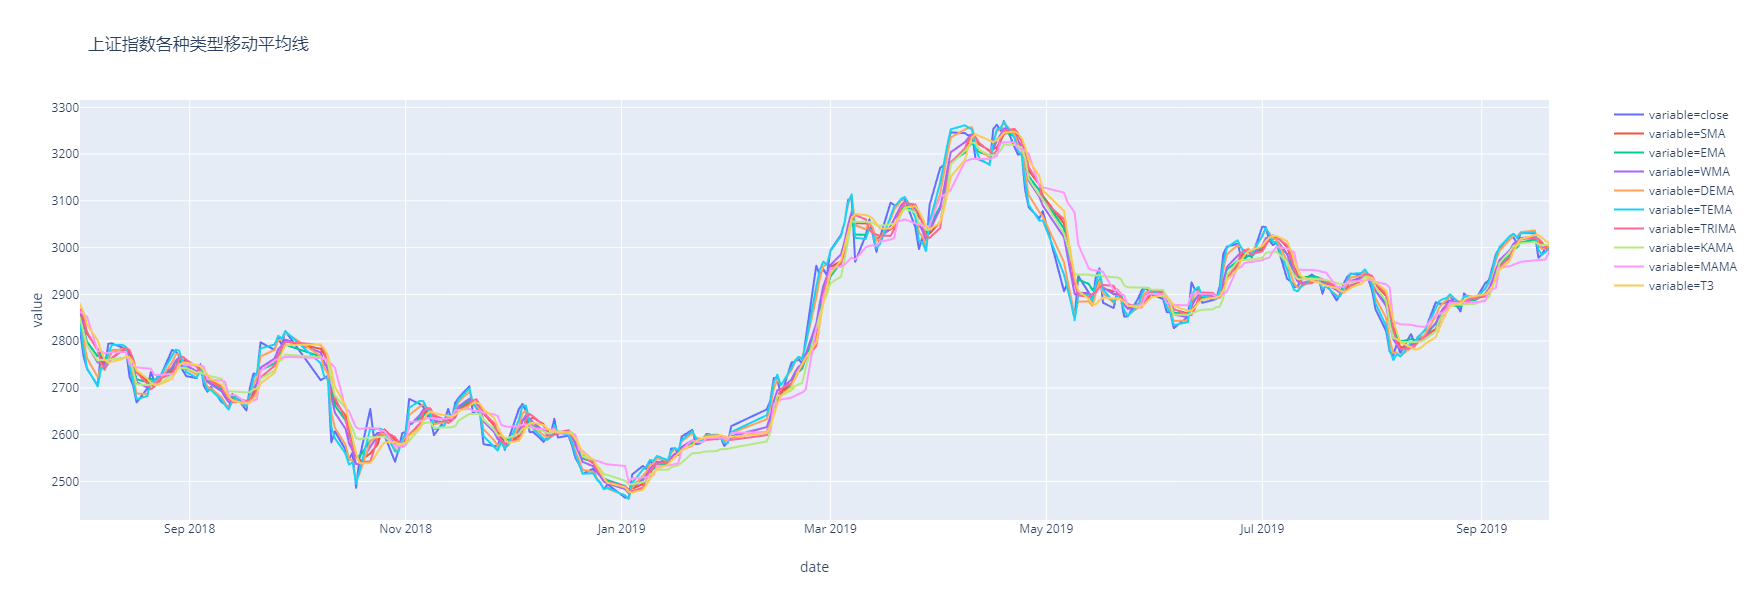

In [28]:
_df = df_ma.loc['2018-08-01':].reset_index()
df_melt = _df.melt(id_vars='date', value_vars=df_ma.columns)
px.line(df_melt, x='date' , y='value' , color='variable', title='上证指数各种类型移动平均线')

In [32]:
#画5、30、120、250指数移动平均线
N=[5, 30, 120, 250]
for i in N:
    df['ma_'+str(i)]=ta.EMA(df.close,timeperiod=i)
df.tail()

# df.loc['2014-01-01':, ['close','ma_5','ma_30','ma_120','ma_250']].plot(figsize=(16,6))
# ax = plt.gca()  
# ax.spines['right'].set_color('none') 
# ax.spines['top'].set_color('none')   
# plt.title('上证指数走势',fontsize=15)
# plt.xlabel('')
# plt.show()

,date,open,close,high,low,volume,code,ma_5,ma_30,ma_120,ma_250
date,,,,,,,,,,,
2019-09-16,2019-09-16,3041.92,3030.75,3042.93,3020.05,221878959.0,sh,3017.438775,2936.302208,2915.179283,2908.453120
2019-09-17,2019-09-17,3023.71,2978.12,3023.71,2970.57,223338061.0,sh,3004.332517,2939.000130,2916.219625,2909.008235
2019-09-18,2019-09-18,2984.08,2985.66,2996.40,2982.40,168046699.0,sh,2998.108345,2942.010445,2917.367400,2909.619006
2019-09-19,2019-09-19,2992.92,2999.28,2999.28,2975.40,162690615.0,sh,2998.498896,2945.705255,2918.721327,2910.333436
2019-09-20,2019-09-20,3004.81,3006.45,3011.34,2996.19,182145302.0,sh,3001.149264,2949.624270,2920.171388,2911.099305


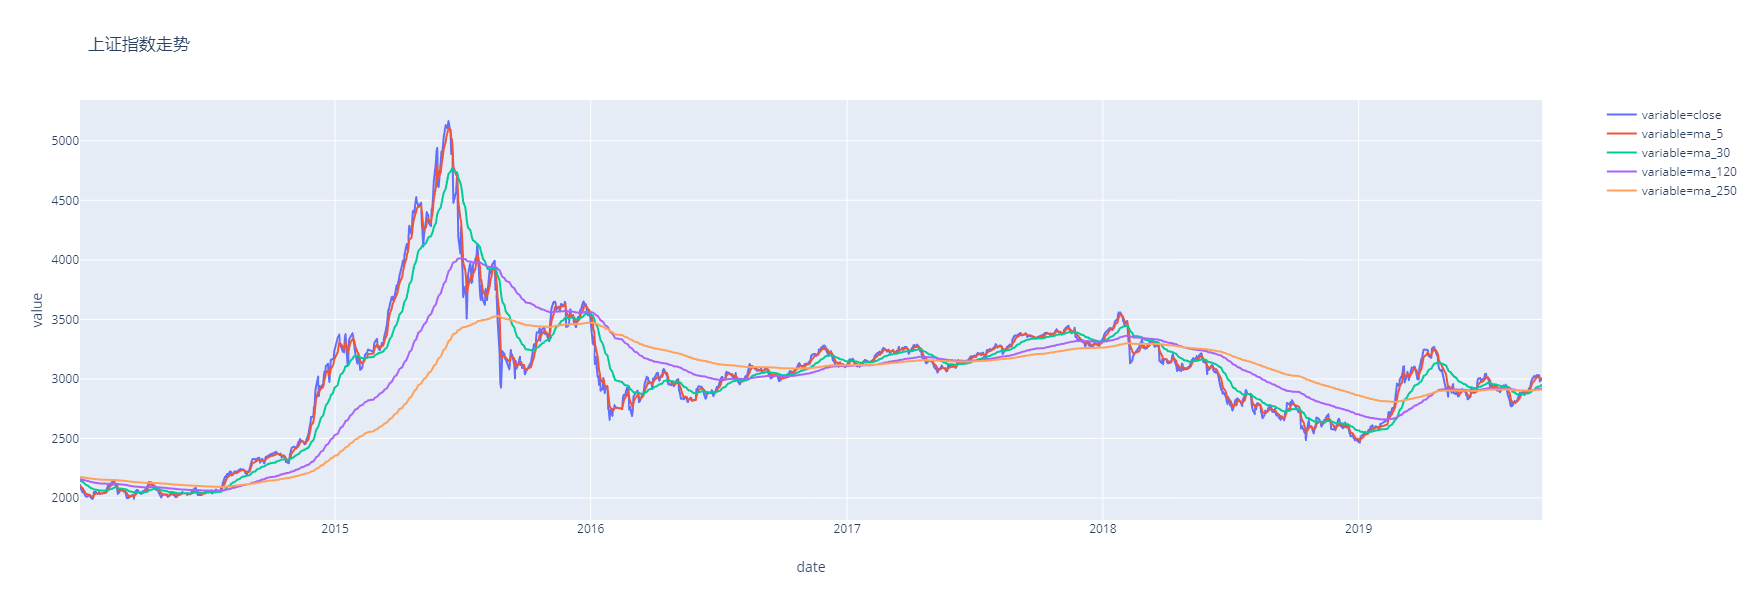

In [38]:
_cols = ['close','ma_5','ma_30','ma_120','ma_250']
_df = df.loc['2014-01-01':, ]   # .reset_index()
df_melt = _df.melt(id_vars='date', value_vars=_cols)
px.line(df_melt, x='date' , y='value' , color='variable', title='上证指数走势')

## 布林带

布林带(Bollinger Band)，由压力线、支撑线价格平均线组成，一般情况价格线在压力线和支撑线组成的上下区间中游走，区间位置会随着价格的变化而自动调整。布林线的理论使用原则是：当股价穿越最外面的压力线（支撑线）时，表示卖点（买点）出现。当股价延着压力线（支撑线）上升（下降）运行，虽然股价并未穿越，但若回头突破第二条线即是卖点或买点。在实际应用中，布林线有其滞后性，相对于其他技术指标在判断行情反转时参考价值较低，但在判断盘整行情终结节点上成功率较高。


计算方法：首先计出过去 N 日收巿价的标准差 SD(Standard Deviation) ，通常再乘 2 得出 2 倍标准差， Up 线为 N日平均线加 2 倍标准差， Down 线则为 N日平均线减 2 倍标准差。

代码：ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

In [40]:
H_line,M_line,L_line=ta.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line
df1.tail()

,close,H_line,M_line,L_line
date,,,,
2019-09-16,3030.75,3058.294447,2938.7425,2819.190553
2019-09-17,2978.12,3061.363258,2943.4935,2825.623742
2019-09-18,2985.66,3064.236265,2948.7765,2833.316735
2019-09-19,2999.28,3067.695689,2954.7240,2841.752311
2019-09-20,3006.45,3071.011333,2960.8745,2850.737667


In [ ]:
# df1.loc['2013-01-01':'2014-12-30'].plot(figsize=(16,6))
# ax = plt.gca()  
# ax.spines['right'].set_color('none') 
# ax.spines['top'].set_color('none')   
# plt.title('上证指数布林线',fontsize=15)
# plt.xlabel('')
# plt.show()

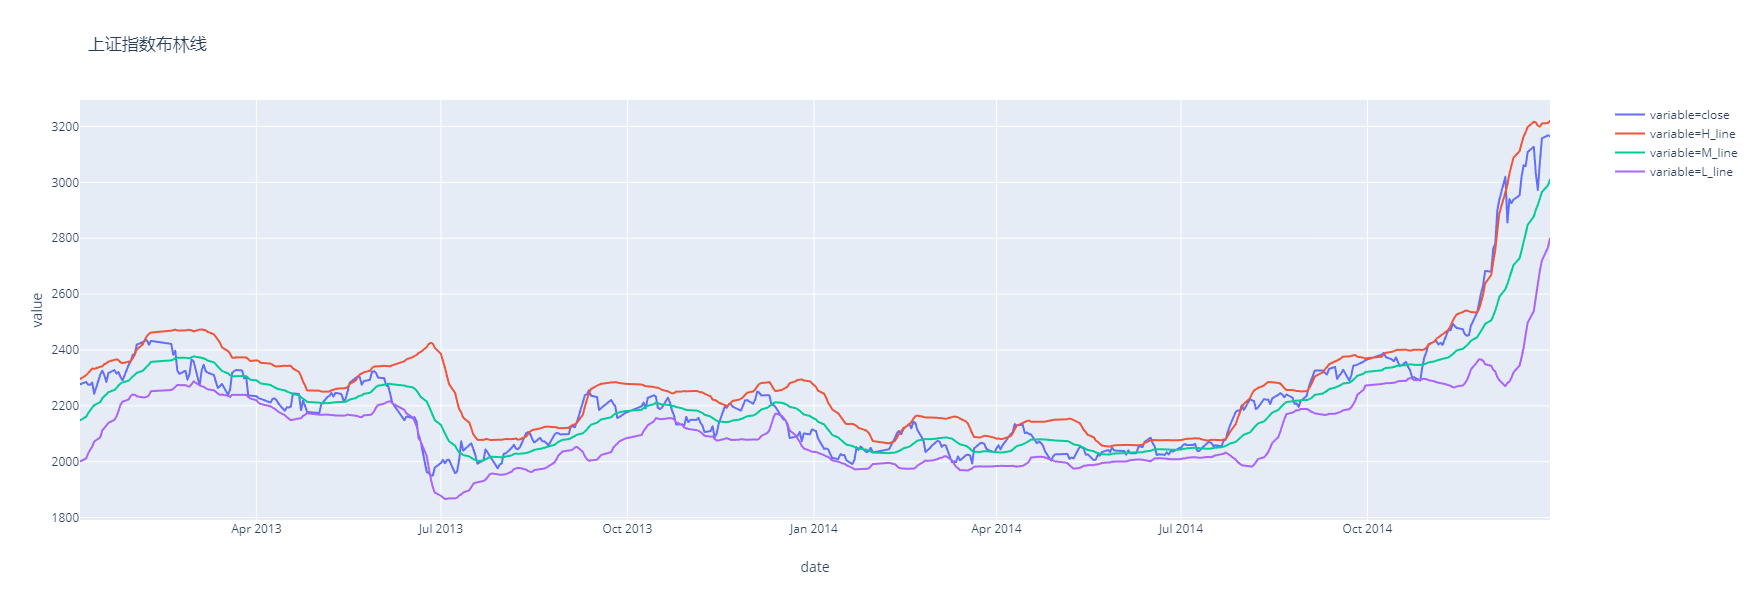

In [41]:
_df = df1.loc['2013-01-01':'2014-12-30'].reset_index()
df_melt = _df.melt(id_vars='date', value_vars=df1.columns)
px.line(df_melt, x='date' , y='value' , color='variable', title='上证指数布林线')

## 其他指标

![](https://pic3.zhimg.com/80/v2-f0c2a8904c14d03ce5a452fb6ab8e652_hd.jpg "asda")

In [42]:
df2=pd.DataFrame(df.close)
df2['HT']=ta.HT_TRENDLINE(df.close)
periods =np.array([3]*len(df), dtype=float)
df2['MAVP']=ta. MAVP(df.close,periods)
df2['MIDPOINT']=ta.MIDPOINT(df.close)
df2['MIDPRICE']=ta.MIDPRICE(df.high,df.low)
df2['SAR']=ta.SAR(df.high,df.low)
df2['SAREXT']=ta.SAREXT(df.high,df.low)
df2.tail()

,close,HT,MAVP,MIDPOINT,MIDPRICE,SAR,SAREXT
date,,,,,,,
2019-09-16,3030.75,2917.708635,3023.600000,2958.740,2958.515,2976.403964,2976.403964
2019-09-17,2978.12,2923.685817,3013.370000,2958.740,2958.515,3042.930000,-3042.930000
2019-09-18,2985.66,2930.368725,2998.176667,2958.740,2958.515,3042.930000,-3042.930000
2019-09-19,2999.28,2937.598043,2987.686667,2958.740,2958.515,3041.482800,-3041.482800
2019-09-20,3006.45,2944.244609,2997.130000,2977.675,2963.305,3040.064544,-3040.064544


In [50]:
# df2.loc['2018-01-01':'2019-02-21',['close','HT','MAVP','MIDPOINT','MIDPRICE','SAR']].plot(figsize=(16,6))
# ax = plt.gca()  
# ax.spines['right'].set_color('none') 
# ax.spines['top'].set_color('none')   
# plt.title('上证指数的其他趋势指标线',fontsize=15)
# plt.xlabel('')
# plt.show()

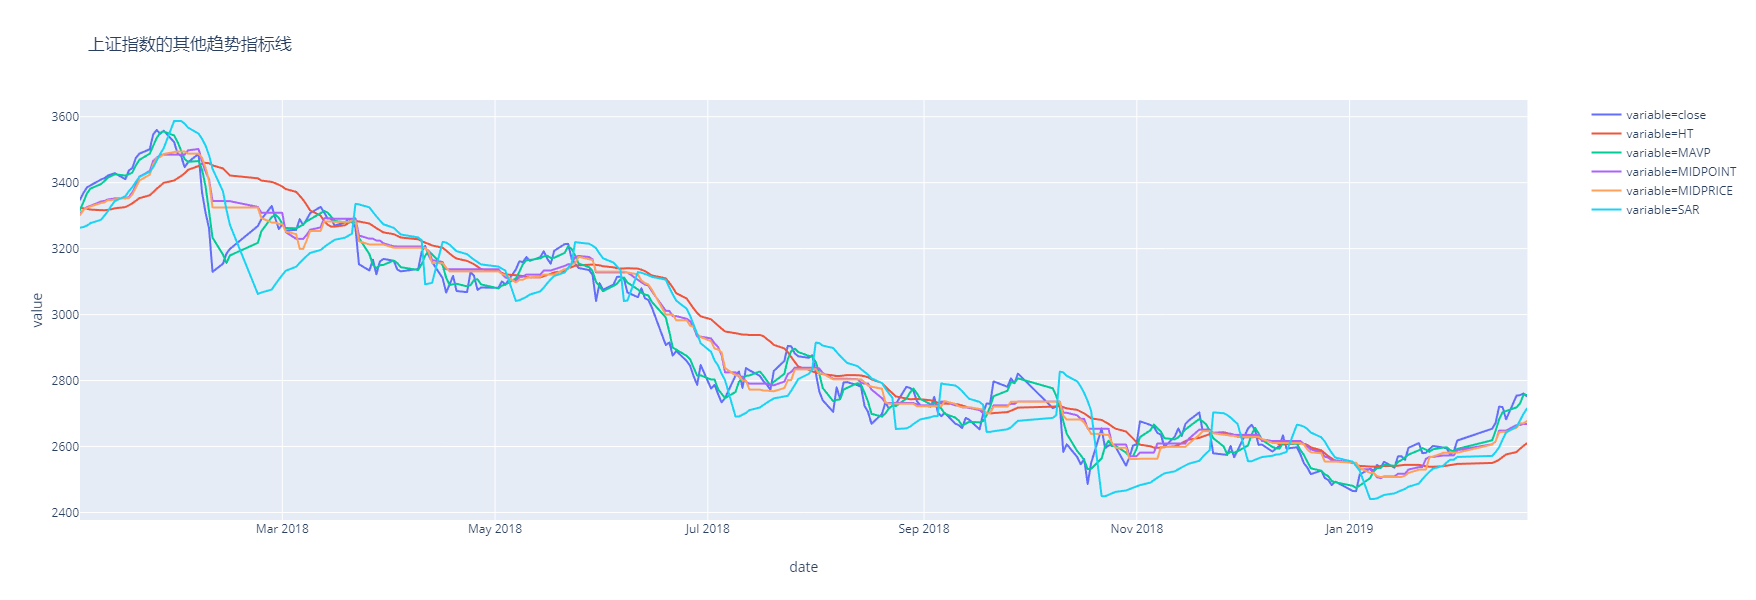

In [45]:
_cols = ['close','HT','MAVP','MIDPOINT','MIDPRICE','SAR']
_df = df2.loc['2018-01-01':'2019-02-21', _cols].reset_index()
df_melt = _df.melt(id_vars='date', value_vars=_cols)
px.line(df_melt, x='date' , y='value' , color='variable', title='上证指数的其他趋势指标线')

In [52]:
# df2.loc['2018-01-01':'2019-02-21','SAREXT'].plot(figsize=(16,6))
# ax = plt.gca()  
# ax.spines['right'].set_color('none') 
# ax.spines['top'].set_color('none')   
# plt.title('上证指数的抛物线扩展走势',fontsize=15)
# plt.xlabel('')
# plt.show()

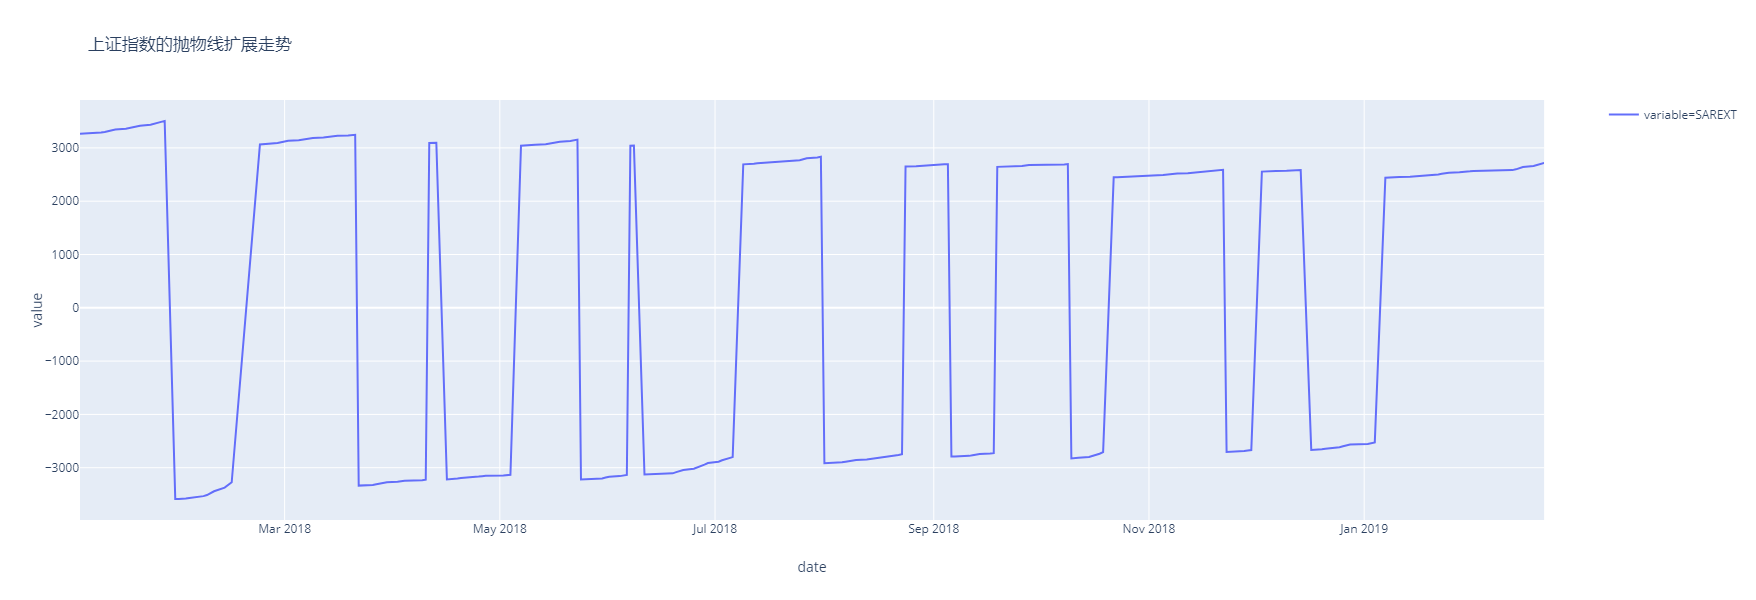

In [51]:
_cols = ['SAREXT']
_df = df2.loc['2018-01-01':'2019-02-21', _cols].reset_index()
df_melt = _df.melt(id_vars='date', value_vars=_cols)
px.line(df_melt, x='date' , y='value' , color='variable', title='上证指数的抛物线扩展走势')

### 均线策略回测

双均线策略：分别选择L天和S天的移动平均线（L>S），如L=20，S=5，当短周期S均线（5日均线）向上突破长周期L均线（20日均线）时，为买入点；反之，当S均线向下击穿L均线时为卖出点。

标的：中国平安（601318），期间：2014.1-2019.1，回测结果：

![](https://pic3.zhimg.com/80/v2-6927c7185f5b75bb5def011302554246_hd.jpg)

数据来源：万矿

### 布林线策略回测

标的：黄金期货

策略：下穿布林线上边界做空，上穿布林线下边界做多

（1）timeperiod=10,回测期间：2017.01.01-2019.02.21

![](https://pic2.zhimg.com/80/v2-4dafe9310781865f1491b5df4f2942fd_hd.jpg)

 数据来源：万矿

（2）timeperiod=10,回测期间：2016.01.01-2017.02.21

![](https://pic4.zhimg.com/80/v2-db4b7b661df44a3fbd2914ea822f2533_hd.jpg)

数据来源：万矿
